In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [281]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close
    return data
def calculate_factor(data1,data2,cal_type):
    mean1 = data1[:,0]
    mean1[np.isnan(mean1)]=-100000
    mean2 = data2[:,0]
    mean2[np.isnan(mean2)]=-100000
    if cal_type == 'max':
        stat1 = np.max(mean1)
        stat2 = np.max(mean2)
    elif cal_type == 'last':
        stat1 = mean1[-1]
        stat2 = mean2[-1]
    factor = stat1/stat2

    
    return factor
def f(game_list,cal_type):
    factor_list = []
    for name in game_list:
    
        filename1 = 'data/plots/extbqrdqn40ms0_result_100_{}.pkl'.format(name)
        filename2 = 'data/plots/exqrdqn40ms0_result_100_{}.pkl'.format(name)
        data1 = read_file(filename1)
        data2 = read_file(filename2)
        factor = calculate_factor(data1,data2,cal_type)
        factor_list.append(factor)
    for name in ['MontezumaRevenge','Enduro']:
        filename1 = 'data/plots/extbqrdqn_result_100_{}.pkl'.format(name)
        filename2 = 'data/plots/exqrdqn_result_100_{}.pkl'.format(name)
        data1 = read_file(filename1)
        data2 = read_file(filename2)
        factor = calculate_factor(data1,data2,cal_type)
        factor_list.append(factor)    
    factor_list = np.array(factor_list)
    return factor_list
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(int(s)*100) for s in x]


In [282]:
game_list = ['Alien','Asterix','Asteroids','Atlantis','BattleZone','BeamRider',
            'Bowling','Boxing','Breakout','Centipede','ChopperCommand','CrazyClimber',
            'FishingDerby','Gopher','Gravitar','Jamesbond','Krull','KungFuMaster',
            'MsPacman','NameThisGame','Pong','Qbert','Riverraid','Robotank','SpaceInvaders',
            'StarGunner','TimePilot','Tutankham','UpNDown','VideoPinball','Zaxxon',
            'Amidar','Assault','BankHeist','DemonAttack','DoubleDunk','Frostbite','Freeway',
            'Hero','IceHockey','Kangaroo','PrivateEye','RoadRunner','Seaquest','Venture',
            'WizardOfWor','Tennis']
# print(game_list)
factor_list = f(game_list,'max')-1
# print(factor_list)
# print(game_list)
sort_idx = np.argsort(factor_list)
# print(sort_idx)
# print(game_list)
game_list.append('MontezumaRevenge')
game_list.append('Enduro')
# print(game_list)
game_sort = get_sorted_list(game_list,sort_idx)[::-1]
factor_sort = np.sort(factor_list)[::-1]
# print(game_sort)
# print(factor_sort)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['Zaxxon', 'MontezumaRevenge', 'Venture', 'Enduro', 'Hero', 'Seaquest', 'Kangaroo', 'Jamesbond', 'WizardOfWor', 'Gopher', 'StarGunner', 'KungFuMaster', 'Breakout', 'FishingDerby', 'Atlantis', 'Krull', 'Freeway', 'TimePilot', 'CrazyClimber', 'Asteroids', 'Qbert', 'Tutankham', 'Gravitar', 'SpaceInvaders', 'Boxing', 'NameThisGame', 'RoadRunner', 'MsPacman', 'Bowling', 'Amidar', 'BankHeist', 'Asterix', 'Alien', 'Pong', 'Centipede', 'DemonAttack', 'IceHockey', 'BeamRider', 'Robotank', 'Riverraid', 'Assault', 'ChopperCommand', 'UpNDown', 'DoubleDunk', 'Frostbite', 'Tennis', 'PrivateEye', 'VideoPinball', 'BattleZone']


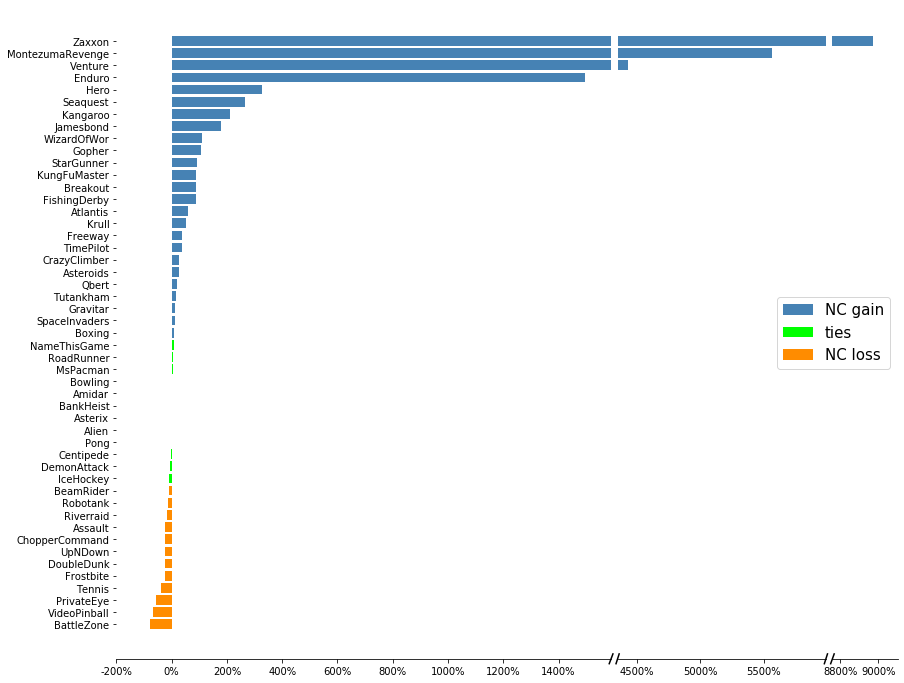

In [283]:
gain = factor_sort[factor_sort>0.1]
tie = factor_sort[factor_sort<=0.1]
tie = tie[tie>-0.1]
loss = factor_sort[factor_sort<=-0.1]

y_pos_gain = np.arange(len(gain))
y_pos_tie = len(gain)+np.arange(len(tie))
y_pos_loss = len(gain)+len(tie)+np.arange(len(loss))
y_pos = np.arange(len(game_sort))
fig = plt.figure(figsize=(14, 12))

grid = plt.GridSpec(1,11,hspace=1,wspace=0.1)
ax = plt.subplot(grid[0,0:7])
ax2 = plt.subplot(grid[0,7:10],sharey=ax,yticklabels=[])
ax3 = plt.subplot(grid[0,10],sharey=ax,yticklabels=[])
# fig,(ax,ax2,ax3) = plt.subplots(1,3,sharey=True)

ax.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='steelblue',height=0.8,label='NC gain')
ax2.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='steelblue',height=0.8,label='NC gain')
ax3.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='steelblue',height=0.8,label='NC gain')
ax.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax2.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax3.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax2.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax3.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax.set_xlim(-2,15.9)
ax2.set_xlim(43.5,59.9)
ax3.set_xlim(87.6,91)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines.set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines.set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelleft='off')
# ax.tick_params(labelsize=0.1)
ax2.get_yaxis().set_visible(False)
# ax2.tick_params(tickright='off')
ax3.get_yaxis().set_visible(False)
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs) 
ax.plot((1 - d/4, 1 + d/4), (-d/2, +d/2), **kwargs)
kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.plot((-d/2, +d/2), ( - d/2,  + d/2), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d/2, 1 + d/2), ( - d/2,  + d/2), **kwargs)
kwargs.update(transform=ax3.transAxes)
# ax3.plot((-d, +d), (1-d, 1+d), **kwargs) 
ax3.plot(( - 1.8*d,  + 1.8*d), (-d/2, +d/2), **kwargs)

font1 = {
'size'   : 10,
}
ax.set_yticks(y_pos)
ax.set_yticklabels(game_sort,font1)
print(game_sort)
# ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(get_xlabel(ax.get_xticks()),font1)
ax2.set_xticklabels(get_xlabel(ax2.get_xticks()),font1)
ax3.set_xticklabels(get_xlabel(ax3.get_xticks()),font1)
# print(get_xlabel(a))
# x = ax.get_yticklabels(which='both')
# print(x)
# ax.get_yticklabels(which='both')
ax.invert_yaxis()
plt.legend(loc=5,prop={'size':15})
# ax.title('Cumulative Reward gain/loss',fontsize=18,loc='left')
fig.savefig('../quantile_curve/reward.eps',dpi=600,format='eps')
# plt.

In [284]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close
    return data
def calculate_factor(data1,data2,cal_type):
    mean1 = data1[:,0]
    mean1[np.isnan(mean1)]=-100000
    mean2 = data2[:,0]
    mean2[np.isnan(mean2)]=-100000
    if cal_type == 'max':
        stat1 = np.max(mean1)
        stat2 = np.max(mean2)
    elif cal_type == 'last':
        stat1 = mean1[-1]
        stat2 = mean2[-1]
    factor = stat1/stat2

    
    return factor
def f(game_list,cal_type):
    factor_list1 = []
    factor_list2 = []
    for name in game_list:
    
        filename1 = 'data/plots/extbqrdqn40ms0_result_100_{}.pkl'.format(name)
        filename2 = 'data/plots/qr-dqns0_result_100_{}.pkl'.format(name)
        data1 = read_file(filename1)
        data2 = read_file(filename2)
        factor = calculate_factor(data1,data2,cal_type)
        factor_list1.append(factor)
 
    
        filename1 = 'data/plots/exqrdqn40ms0_result_100_{}.pkl'.format(name)
        filename2 = 'data/plots/qr-dqns0_result_100_{}.pkl'.format(name)
        data1 = read_file(filename1)
        data2 = read_file(filename2)
        factor = calculate_factor(data1,data2,cal_type)
        factor_list2.append(factor)   
    factor_list1 = np.array(factor_list1)
    factor_list2 = np.array(factor_list2)
    return factor_list1,factor_list2
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(s*100) for s in x]


In [285]:
game_list = ['Asterix','Asteroids','Atlantis','BattleZone',
            'Bowling','Breakout','Centipede','ChopperCommand','CrazyClimber',
            'FishingDerby','Gopher','Gravitar','NameThisGame','Pong','Riverraid',
             'SpaceInvaders','TimePilot','Tutankham','VideoPinball','Zaxxon',
            'DoubleDunk','Tennis']
# print(game_list)
factor_list1,factor_list2 = f(game_list,'max')
factor_list1 = factor_list1 -1
factor_list2 = factor_list2 -1
# print(factor_list)
# print(game_list)
sort_idx = np.argsort(factor_list1)
# print(sort_idx)
# print(game_list)
# game_list.append('MontezumaRevenge')
# game_list.append('Enduro')
# print(game_list)
game_sort = get_sorted_list(game_list,sort_idx)[::-1]
factor_sort1 = np.sort(factor_list1)[::-1]
factor_sort2 = factor_list2[sort_idx][::-1]
print(game_sort)
# print(factor_sort)
# print(factor_sort1)
# print(factor_sort2)

['Asterix', 'Tutankham', 'Gopher', 'Breakout', 'TimePilot', 'Atlantis', 'Asteroids', 'Zaxxon', 'Gravitar', 'NameThisGame', 'CrazyClimber', 'FishingDerby', 'SpaceInvaders', 'ChopperCommand', 'Pong', 'Riverraid', 'Bowling', 'Centipede', 'DoubleDunk', 'VideoPinball', 'Tennis', 'BattleZone']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['Asterix', 'Tutankham', 'Gopher', 'Breakout', 'TimePilot', 'Atlantis', 'Asteroids', 'Zaxxon', 'Gravitar', 'NameThisGame', 'CrazyClimber', 'FishingDerby', 'SpaceInvaders', 'ChopperCommand', 'Pong', 'Riverraid', 'Bowling', 'Centipede', 'DoubleDunk', 'VideoPinball', 'Tennis', 'BattleZone']


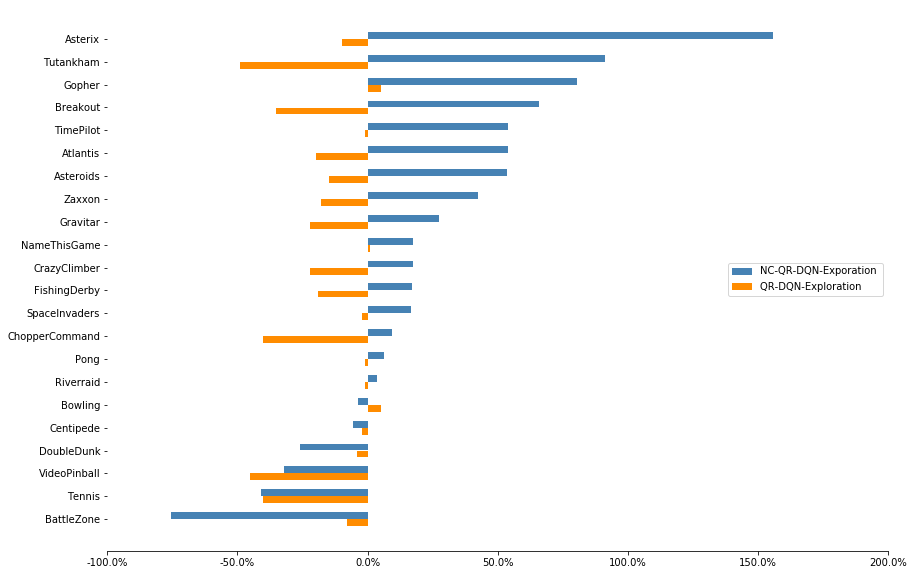

In [286]:
# gain = factor_sort[factor_sort>0.1]
# tie = factor_sort[factor_sort<=0.1]
# tie = tie[tie>-0.1]
# loss = factor_sort[factor_sort<=-0.1]

# gain = factor_sort[factor_sort>0.1]
# tie = factor_sort[factor_sort<=0.1]
# tie = tie[tie>-0.1]
# loss = factor_sort[factor_sort<=-0.1]
factor_sort2 = np.array([-0.1,-0.49,0.05,-0.35,-0.01,-0.2,-0.15,-0.18,-0.22,0.01,
                        -0.22,-0.19,-0.02,-0.4,-0.01,-0.01,0.05,-0.02,-0.04,-0.45,
                         -0.4,-0.08])
# y_pos_gain = np.arange(len(gain))
# y_pos_tie = len(gain)+np.arange(len(tie))
# y_pos_loss = len(gain)+len(tie)+np.arange(len(loss))
y_pos = np.arange(len(game_sort))
fig = plt.figure(figsize=(14, 10))
total_width ,n = 0.9,2
width = total_width / 2.9
y_pos=y_pos - (total_width - width) / 2

# grid = plt.GridSpec(1,11,hspace=1,wspace=0.1)
ax = plt.subplot()
# ax2 = plt.subplot(grid[0,7:10],sharey=ax,yticklabels=[])
# ax3 = plt.subplot(grid[0,10],sharey=ax,yticklabels=[])
# fig,(ax,ax2,ax3) = plt.subplots(1,3,sharey=True)

ax.barh(y_pos, factor_sort1, align='center',
        color='steelblue',height=0.3,label='NC-QR-DQN-Exporation ')
# ax2.barh(y_pos, factor_sort1, align='center',
#         color='navy',height=0.2,label='NC ')
# ax3.barh(y_pos, factor_sort1, align='center',
#         color='navy',height=0.2,label='NC ')
ax.barh(y_pos+width, factor_sort2, align='center',
        color='darkorange',height=0.3,label='QR-DQN-Exploration ')
# ax2.barh(y_pos+width, factor_sort2, align='center',
#         color='darkorange',height=0.2,label='NC ')
# ax3.barh(y_pos+width, factor_sort2, align='center',
#         color='darkorange',height=0.2,label='NC ')
# ax.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
# ax2.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
# ax3.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
# ax.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
# ax2.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
# ax3.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
ax.set_xlim(-1,2)
# ax2.set_xlim(43.5,59.9)
# ax3.set_xlim(87.6,91)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines.set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# # ax2.spines['bottom'].set_visible(False)
# # ax2.spines.set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.spines['left'].set_visible(False)
# ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelleft='off')
# ax.tick_params(labelsize=0.1)
# ax2.get_yaxis().set_visible(False)
# # ax2.tick_params(tickright='off')
# ax3.get_yaxis().set_visible(False)
# d = .015
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# # ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs) 
# ax.plot((1 - d/4, 1 + d/4), (-d/2, +d/2), **kwargs)
# kwargs.update(transform=ax2.transAxes)
# # ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# ax2.plot((-d/2, +d/2), ( - d/2,  + d/2), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d/2, 1 + d/2), ( - d/2,  + d/2), **kwargs)
# kwargs.update(transform=ax3.transAxes)
# # ax3.plot((-d, +d), (1-d, 1+d), **kwargs) 
# ax3.plot(( - 1.8*d,  + 1.8*d), (-d/2, +d/2), **kwargs)

font1 = {
'size'   : 10,
}
ax.set_yticks(y_pos+width/2.0)
ax.set_yticklabels(game_sort,font1)
print(game_sort)
# ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(get_xlabel(ax.get_xticks()),font1)
# ax2.set_xticklabels(get_xlabel(ax2.get_xticks()),font1)
# ax3.set_xticklabels(get_xlabel(ax3.get_xticks()),font1)
# print(get_xlabel(a))
# x = ax.get_yticklabels(which='both')
# print(x)
# ax.get_yticklabels(which='both')
ax.invert_yaxis()
plt.legend(loc=5,prop={'size':10})
# ax.title('Cumulative Reward gain/loss',fontsize=18,loc='left')
fig.savefig('../quantile_curve/contrastreward.eps',dpi=600,format='eps')
# plt.

['-200.0%', '-100.0%', '0.0%', '100.0%', '200.0%', '300.0%', '400.0%']


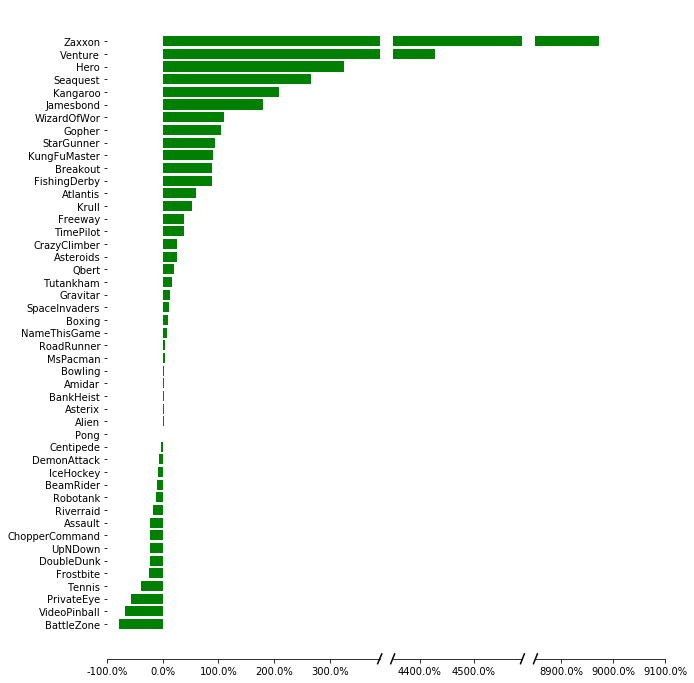

In [164]:
# gain = factor_sort[factor_sort>0.1]
# tie = factor_sort[factor_sort<=0.1]
# tie = tie[tie>-0.1]
# loss = factor_sort[factor_sort<=-0.1]


fig = plt.figure(figsize=(10, 12))

grid = plt.GridSpec(1,4,hspace=1,wspace=0.1)
ax = plt.subplot(grid[0,0:2])
ax2 = plt.subplot(grid[0,2],sharey=ax,yticklabels=[])
ax3 = plt.subplot(grid[0,3],sharey=ax,yticklabels=[])
# fig,(ax,ax2,ax3) = plt.subplots(1,3,sharey=True)

ax.barh(y_pos, factor_sort, align='center',
        color='green',height=0.8,label='a')
ax2.barh(y_pos, factor_sort, align='center',
        color='green',height=0.8,label='a')
ax3.barh(y_pos, factor_sort, align='center',
        color='green',height=0.8,label='a')
ax.set_xlim(-1,3.9)
ax2.set_xlim(43.5,45.9)
ax3.set_xlim(88.5,91)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines.set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines.set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelleft='off')
# ax.tick_params(labelsize=0.1)
ax2.get_yaxis().set_visible(False)
# ax2.tick_params(tickright='off')
ax3.get_yaxis().set_visible(False)
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs) 
ax.plot((1 - d/2, 1 + d/2), (-d/2, +d/2), **kwargs)
kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.plot((-d, +d), ( - d/2,  + d/2), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), ( - d/2,  + d/2), **kwargs)
kwargs.update(transform=ax3.transAxes)
# ax3.plot((-d, +d), (1-d, 1+d), **kwargs) 
ax3.plot(( - d,  + d), (-d/2, +d/2), **kwargs)

font1 = {
'size'   : 10,
}
ax.set_yticks(y_pos)
ax.set_yticklabels(game_sort,font1)
# ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(get_xlabel(ax.get_xticks()),font1)
ax2.set_xticklabels(get_xlabel(ax2.get_xticks()),font1)
ax3.set_xticklabels(get_xlabel(ax3.get_xticks()),font1)
print(get_xlabel(a))
# x = ax.get_yticklabels(which='both')
# print(x)
# ax.get_yticklabels(which='both')
ax.invert_yaxis()
# plt.

In [162]:

print(gain,tie,loss)

[89.73333333 44.28571429  3.25951196  2.6672      2.09635777  1.80423814
  1.0956548   1.04897128  0.93682563  0.89690844  0.88378656  0.88374384
  0.60265373  0.51802305  0.38695652  0.38022425  0.26291227  0.25483494
  0.206535    0.16705699  0.12227603  0.10527632  0.10008907] [ 0.08076893  0.04552202  0.0355182   0.02567642  0.01951276  0.01816782
  0.01722869  0.01620513  0.0078125  -0.0295027  -0.06979787 -0.08588235] [-0.10596055 -0.12013911 -0.17458114 -0.22998322 -0.23510185 -0.23646015
 -0.23666667 -0.24313255 -0.39777778 -0.56612113 -0.67237191 -0.79196787]


['-200.0%', '-100.0%', '0.0%', '100.0%', '200.0%', '300.0%', '400.0%']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


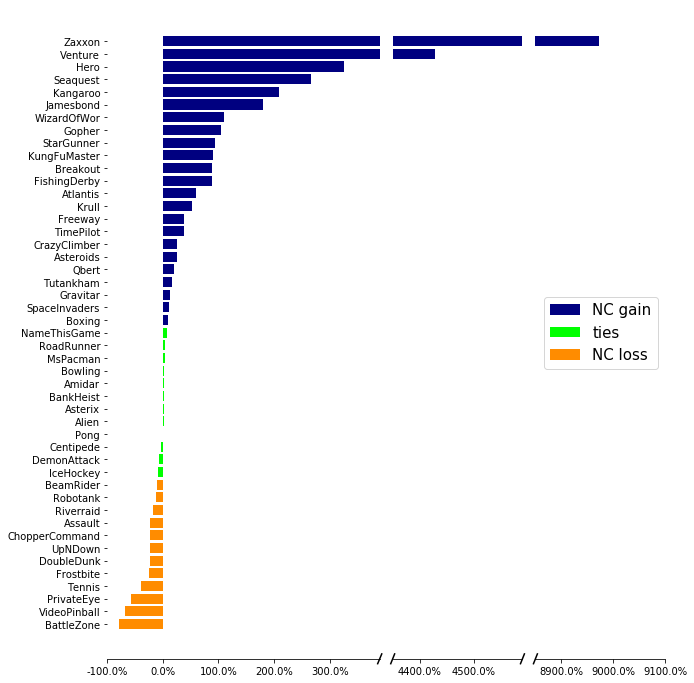

In [182]:
gain = factor_sort[factor_sort>0.1]
tie = factor_sort[factor_sort<=0.1]
tie = tie[tie>-0.1]
loss = factor_sort[factor_sort<=-0.1]

y_pos_gain = np.arange(len(gain))
y_pos_tie = len(gain)+np.arange(len(tie))
y_pos_loss = len(gain)+len(tie)+np.arange(len(loss))
fig = plt.figure(figsize=(10, 12))

grid = plt.GridSpec(1,4,hspace=1,wspace=0.1)
ax = plt.subplot(grid[0,0:2])
ax2 = plt.subplot(grid[0,2],sharey=ax,yticklabels=[])
ax3 = plt.subplot(grid[0,3],sharey=ax,yticklabels=[])
# fig,(ax,ax2,ax3) = plt.subplots(1,3,sharey=True)

ax.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='navy',height=0.8,label='NC gain')
ax2.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='navy',height=0.8,label='NC gain')
ax3.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='navy',height=0.8,label='NC gain')
ax.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax2.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax3.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax2.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax3.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax.set_xlim(-1,3.9)
ax2.set_xlim(43.5,45.9)
ax3.set_xlim(88.5,91)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines.set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines.set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelleft='off')
# ax.tick_params(labelsize=0.1)
ax2.get_yaxis().set_visible(False)
# ax2.tick_params(tickright='off')
ax3.get_yaxis().set_visible(False)
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs) 
ax.plot((1 - d/2, 1 + d/2), (-d/2, +d/2), **kwargs)
kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.plot((-d, +d), ( - d/2,  + d/2), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), ( - d/2,  + d/2), **kwargs)
kwargs.update(transform=ax3.transAxes)
# ax3.plot((-d, +d), (1-d, 1+d), **kwargs) 
ax3.plot(( - d,  + d), (-d/2, +d/2), **kwargs)

font1 = {
'size'   : 10,
}
ax.set_yticks(y_pos)
ax.set_yticklabels(game_sort,font1)
# ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(get_xlabel(ax.get_xticks()),font1)
ax2.set_xticklabels(get_xlabel(ax2.get_xticks()),font1)
ax3.set_xticklabels(get_xlabel(ax3.get_xticks()),font1)
print(get_xlabel(a))
# x = ax.get_yticklabels(which='both')
# print(x)
# ax.get_yticklabels(which='both')
ax.invert_yaxis()
plt.legend(loc=5,prop={'size':15})
# ax.title('Cumulative Reward gain/loss',fontsize=18,loc='left')
fig.savefig('../quantile_curve/reward.eps',dpi=600,format='eps')
# plt.

In [190]:
game_list = ['Alien','Asterix','Asteroids','Atlantis','BattleZone','BeamRider',
            'Bowling','Boxing','Breakout','Centipede','ChopperCommand','CrazyClimber',
            'FishingDerby','Gopher','Gravitar','Jamesbond','Krull','KungFuMaster',
            'MsPacman','NameThisGame','Pong','Qbert','Riverraid','Robotank','SpaceInvaders',
            'StarGunner','TimePilot','Tutankham','UpNDown','VideoPinball','Zaxxon',
            'Amidar','Assault','BankHeist','DemonAttack','DoubleDunk','Frostbite','Freeway',
            'Hero','IceHockey','Kangaroo','PrivateEye','RoadRunner','Seaquest','Venture',
            'WizardOfWor','Tennis']

game_list = game_list.append('a')
print(game_list)

None


In [401]:
def read_file(path_name):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    return data[0]
def calculate_factor(data1,data2,b,cal_type):

    if cal_type == 'max':
        mean1 = data1[:,2]
        mean1[np.isnan(mean1)]=0
        mean2 = data2[:,2]
        mean2[np.isnan(mean2)]=0        
        stat1 = np.max(mean1)-b
        stat2 = np.max(mean2)-b
    elif cal_type == 'mean':
        mean1 = data1[:,0]
        mean1[np.isnan(mean1)]=0
        mean2 = data2[:,0]
        mean2[np.isnan(mean2)]=0        
        stat1 = np.mean(mean1)-b
        stat2 = np.mean(mean2)-b
    if np.abs(stat2)<1:
        stat2=1
    factor = stat1/stat2

    
    return factor
def f(game_list,base,cal_type):
    factor_list = []
    for name,b in zip(game_list,base):
    
        filename1 = 'data/test/extbqrdqn40ms0_test100_{}.pkl'.format(name)
        filename2 = 'data/test/exqrdqn40ms0_test100_{}.pkl'.format(name)
        data1 = read_file(filename1)
        data2 = read_file(filename2)
        factor = calculate_factor(data1,data2,b,cal_type)
        factor_list.append(factor)
#     for name in ['MontezumaRevenge','Enduro']:
#         filename1 = 'data/plots/extbqrdqn_result_100_{}.pkl'.format(name)
#         filename2 = 'data/plots/exqrdqn_result_100_{}.pkl'.format(name)
#         data1 = read_file(filename1)
#         data2 = read_file(filename2)
#         factor = calculate_factor(data1,data2,cal_type)
#         factor_list.append(factor)    
    factor_list = np.array(factor_list)
    return factor_list
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(int(s)*100) for s in x]


In [423]:
# game_list = ['Alien','Asterix','Asteroids','Atlantis','BattleZone','BeamRider',
#             'Bowling','Boxing','Breakout','Centipede','ChopperCommand','CrazyClimber',
#             'FishingDerby','Gopher','Gravitar','Jamesbond','Krull','KungFuMaster',
#             'MsPacman','NameThisGame','Pong','Qbert','Riverraid','Robotank','SpaceInvaders',
#             'StarGunner','TimePilot','Tutankham','UpNDown','VideoPinball','Zaxxon',
#             'Amidar','Assault','BankHeist','DemonAttack','DoubleDunk','Frostbite','Freeway',
#             'Hero','IceHockey','Kangaroo','PrivateEye','RoadRunner','Seaquest','Venture',
#             'WizardOfWor','Tennis','MontezumaRevenge','Enduro']
game_list = ['Alien','Asterix','Asteroids','Atlantis','BattleZone','BeamRider',
            'Bowling','Boxing','Breakout','Centipede','ChopperCommand','CrazyClimber',
            'FishingDerby','Gopher','Gravitar','Jamesbond','Krull','KungFuMaster',
            'MsPacman','NameThisGame','Pong','Qbert','Riverraid','Robotank','SpaceInvaders',
            'StarGunner','TimePilot','Tutankham','UpNDown','VideoPinball','Zaxxon',
            'Amidar','Assault','BankHeist','DemonAttack','DoubleDunk','Frostbite','Freeway',
            'Hero','IceHockey','Kangaroo','PrivateEye','RoadRunner','Seaquest','Venture',
            'WizardOfWor','Tennis','MontezumaRevenge','Enduro']
base = [0,0,0,0,0,0,0,0,0,0,0,0,
       -100,0,0,0,0,0,0,0,-20,0,0,0,0,
       0,0,0,0,0,0,0,0,0,0,-30,0,0,
       0,-18,0,-400,0,0,0,0,-24,0,0]
# print(game_list)
factor_list = f(game_list,base,'mean')-1
# print(factor_list)
# print(game_list)
sort_idx = np.argsort(factor_list)
# print(sort_idx)
# print(game_list)
# game_list.append('MontezumaRevenge')
# game_list.append('Enduro')
# print(game_list)
game_sort = get_sorted_list(game_list,sort_idx)[::-1]
factor_sort = np.sort(factor_list)[::-1]
# print(game_sort)
# print(factor_sort)
print(game_sort)
print(factor_sort)
print(np.mean(factor_sort[1:]))

['Zaxxon', 'Venture', 'MontezumaRevenge', 'Hero', 'Atlantis', 'Enduro', 'TimePilot', 'DemonAttack', 'Tennis', 'Seaquest', 'Jamesbond', 'Gopher', 'Kangaroo', 'IceHockey', 'KungFuMaster', 'Breakout', 'DoubleDunk', 'Alien', 'Gravitar', 'Asterix', 'WizardOfWor', 'Freeway', 'StarGunner', 'Krull', 'PrivateEye', 'BankHeist', 'Qbert', 'NameThisGame', 'RoadRunner', 'Boxing', 'Assault', 'FishingDerby', 'BeamRider', 'Pong', 'CrazyClimber', 'SpaceInvaders', 'UpNDown', 'Riverraid', 'MsPacman', 'Robotank', 'Amidar', 'Asteroids', 'ChopperCommand', 'Centipede', 'Bowling', 'Tutankham', 'Frostbite', 'VideoPinball', 'BattleZone']
[ 2.22526660e+03  7.10835393e+02  6.54570000e+01  1.26051241e+01
  9.12632010e+00  8.62825238e+00  6.44360899e+00  3.64215717e+00
  3.13424803e+00  2.87918110e+00  1.59326835e+00  1.30854690e+00
  1.26387961e+00  1.14373790e+00  1.06820578e+00  8.41656190e-01
  6.59002576e-01  6.31818500e-01  5.21942261e-01  4.95623413e-01
  4.35539890e-01  3.85377202e-01  3.19652744e-01  3.0091

['Zaxxon', 'Venture', 'MontezumaRevenge', 'Hero', 'Atlantis', 'Enduro', 'TimePilot', 'DemonAttack', 'Tennis', 'Seaquest', 'Jamesbond', 'Gopher', 'Kangaroo', 'IceHockey', 'KungFuMaster', 'Breakout', 'DoubleDunk', 'Alien', 'Gravitar', 'Asterix', 'WizardOfWor', 'Freeway', 'StarGunner', 'Krull', 'PrivateEye', 'BankHeist', 'Qbert', 'NameThisGame', 'RoadRunner', 'Boxing', 'Assault', 'FishingDerby', 'BeamRider', 'Pong', 'CrazyClimber', 'SpaceInvaders', 'UpNDown', 'Riverraid', 'MsPacman', 'Robotank', 'Amidar', 'Asteroids', 'ChopperCommand', 'Centipede', 'Bowling', 'Tutankham', 'Frostbite', 'VideoPinball', 'BattleZone']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


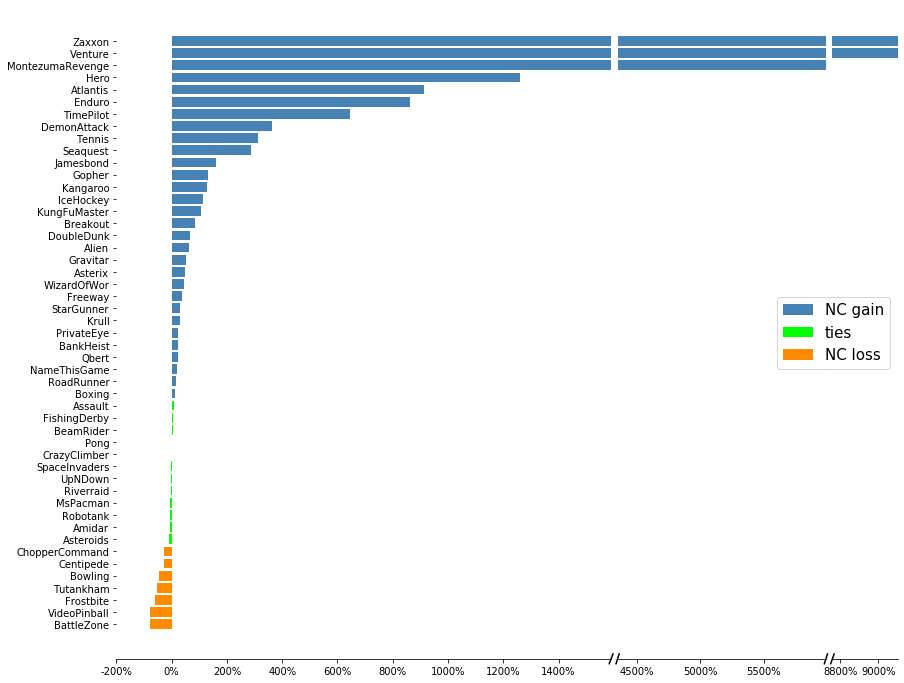

In [392]:
gain = factor_sort[factor_sort>0.1]
tie = factor_sort[factor_sort<=0.1]
tie = tie[tie>-0.1]
loss = factor_sort[factor_sort<=-0.1]

y_pos_gain = np.arange(len(gain))
y_pos_tie = len(gain)+np.arange(len(tie))
y_pos_loss = len(gain)+len(tie)+np.arange(len(loss))
y_pos = np.arange(len(game_sort))
fig = plt.figure(figsize=(14, 12))

grid = plt.GridSpec(1,11,hspace=1,wspace=0.1)
ax = plt.subplot(grid[0,0:7])
ax2 = plt.subplot(grid[0,7:10],sharey=ax,yticklabels=[])
ax3 = plt.subplot(grid[0,10],sharey=ax,yticklabels=[])
# fig,(ax,ax2,ax3) = plt.subplots(1,3,sharey=True)




ax.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='steelblue',height=0.8,label='NC gain')
ax2.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='steelblue',height=0.8,label='NC gain')
ax3.barh(y_pos_gain, factor_sort[:len(gain)], align='center',
        color='steelblue',height=0.8,label='NC gain')
ax.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax2.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax3.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
ax.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax2.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax3.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
ax.set_xlim(-2,15.9)
ax2.set_xlim(43.5,59.9)
ax3.set_xlim(87.6,91)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines.set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines.set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelleft='off')
# ax.tick_params(labelsize=0.1)
ax2.get_yaxis().set_visible(False)
# ax2.tick_params(tickright='off')
ax3.get_yaxis().set_visible(False)
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs) 
ax.plot((1 - d/4, 1 + d/4), (-d/2, +d/2), **kwargs)
kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.plot((-d/2, +d/2), ( - d/2,  + d/2), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d/2, 1 + d/2), ( - d/2,  + d/2), **kwargs)
kwargs.update(transform=ax3.transAxes)
# ax3.plot((-d, +d), (1-d, 1+d), **kwargs) 
ax3.plot(( - 1.8*d,  + 1.8*d), (-d/2, +d/2), **kwargs)

font1 = {
'size'   : 10,
}
ax.set_yticks(y_pos)
ax.set_yticklabels(game_sort,font1)
print(game_sort)
# ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(get_xlabel(ax.get_xticks()),font1)
ax2.set_xticklabels(get_xlabel(ax2.get_xticks()),font1)
ax3.set_xticklabels(get_xlabel(ax3.get_xticks()),font1)
# print(get_xlabel(a))
# x = ax.get_yticklabels(which='both')
# print(x)
# ax.get_yticklabels(which='both')
ax.invert_yaxis()
plt.legend(loc=5,prop={'size':15})
# ax.title('Cumulative Reward gain/loss',fontsize=18,loc='left')
fig.savefig('../quantile_curve/testreward.eps',dpi=600,format='eps')
# plt.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['Zaxxon', 'Venture', 'MontezumaRevenge', 'Hero', 'Atlantis', 'Enduro', 'TimePilot', 'DemonAttack', 'Tennis', 'Seaquest', 'Jamesbond', 'Gopher', 'Kangaroo', 'IceHockey', 'KungFuMaster', 'Breakout', 'DoubleDunk', 'Alien', 'Gravitar', 'Asterix', 'WizardOfWor', 'Freeway', 'StarGunner', 'Krull', 'PrivateEye', 'BankHeist', 'Qbert', 'NameThisGame', 'RoadRunner', 'Boxing', 'Assault', 'FishingDerby', 'BeamRider', 'Pong', 'CrazyClimber', 'SpaceInvaders', 'UpNDown', 'Riverraid', 'MsPacman', 'Robotank', 'Amidar', 'Asteroids', 'ChopperCommand', 'Centipede', 'Bowling', 'Tutankham', 'Frostbite', 'VideoPinball', 'BattleZone']


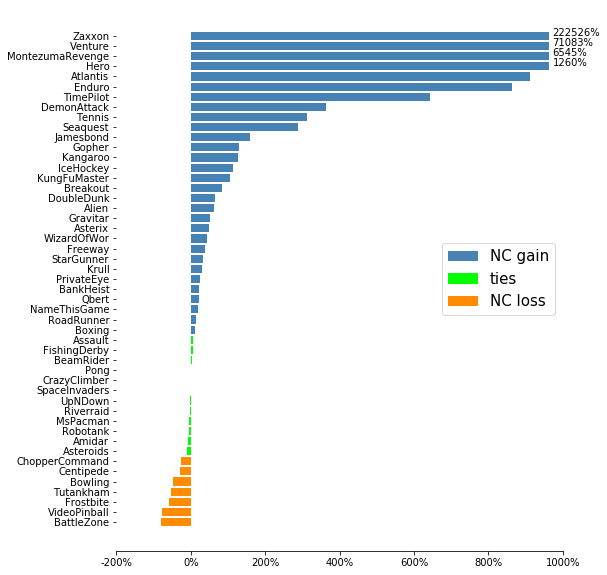

In [425]:

gain = factor_sort[factor_sort>0.1]
tie = factor_sort[factor_sort<=0.1]
tie = tie[tie>-0.1]
loss = factor_sort[factor_sort<=-0.1]

y_pos_gain = np.arange(len(gain))
y_pos_tie = len(gain)+np.arange(len(tie))
y_pos_loss = len(gain)+len(tie)+np.arange(len(loss))
y_pos = np.arange(len(game_sort))


fig = plt.figure(figsize=(8, 10))
# x = np.arange(0,qr[0].shape[1])/qr[0].shape[1]*40
ax = fig.add_subplot(1, 1, 1)

# grid = plt.GridSpec(1,11,hspace=1,wspace=0.1)
# ax = plt.subplot(grid[0,0:7])
# ax2 = plt.subplot(grid[0,7:10],sharey=ax,yticklabels=[])
# ax3 = plt.subplot(grid[0,10],sharey=ax,yticklabels=[])
# fig,(ax,ax2,ax3) = plt.subplots(1,3,sharey=True)
extrem = 4

ax.barh(y_pos_gain[:extrem], np.ones(extrem)*(factor_sort[extrem]+0.5), align='center',
        color='steelblue',height=0.8)
for i in range(extrem):
    ax.text(factor_sort[extrem]+0.6,y_pos[i],'{}%'.format(int(factor_sort[i]*100)),fontsize=10)
ax.barh(y_pos_gain[extrem:], factor_sort[extrem:len(gain)], align='center',
        color='steelblue',height=0.8,label='NC gain')
# ax2.barh(y_pos_gain[extrem:], factor_sort[extrem:len(gain)], align='center',
#         color='steelblue',height=0.8,label='NC gain')
# ax3.barh(y_pos_gain[extrem:], factor_sort[extrem:len(gain)], align='center',
#         color='steelblue',height=0.8,label='NC gain')
ax.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
        color='lime',height=0.8,label='ties')
# ax2.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
# ax3.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
ax.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
        color='darkorange',height=0.8,label='NC loss')
# ax2.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
# ax3.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
ax.set_xlim(-2,10)
# ax2.set_xlim(43.5,59.9)
# ax3.set_xlim(87.6,91)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines.set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# # ax2.spines['bottom'].set_visible(False)
# # ax2.spines.set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.spines['left'].set_visible(False)
# ax3.spines['top'].set_visible(False)
# # ax3.spines['bottom'].set_visible(False)
# # ax.yaxis.tick_left()
# # ax.tick_params(labelleft='off')
# # ax.tick_params(labelsize=0.1)
# ax2.get_yaxis().set_visible(False)
# # ax2.tick_params(tickright='off')
# ax3.get_yaxis().set_visible(False)
# d = .015
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# # ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs) 
# ax.plot((1 - d/4, 1 + d/4), (-d/2, +d/2), **kwargs)
# kwargs.update(transform=ax2.transAxes)
# # ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# ax2.plot((-d/2, +d/2), ( - d/2,  + d/2), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d/2, 1 + d/2), ( - d/2,  + d/2), **kwargs)
# kwargs.update(transform=ax3.transAxes)
# # ax3.plot((-d, +d), (1-d, 1+d), **kwargs) 
# ax3.plot(( - 1.8*d,  + 1.8*d), (-d/2, +d/2), **kwargs)

font1 = {
'size'   : 10,
}
ax.set_yticks(y_pos)
ax.set_yticklabels(game_sort,font1)
print(game_sort)
ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(get_xlabel(ax.get_xticks()),font1)
# ax2.set_xticklabels(get_xlabel(ax2.get_xticks()),font1)
# ax3.set_xticklabels(get_xlabel(ax3.get_xticks()),font1)
# print(get_xlabel(a))
# x = ax.get_yticklabels(which='both')
# print(x)
# ax.get_yticklabels(which='both')
ax.invert_yaxis()
plt.legend(loc=5,prop={'size':15})
# ax.title('Cumulative Reward gain/loss',fontsize=18,loc='left')
fig.savefig('../quantile_curve/testreward.eps',dpi=600,format='eps')
# plt.

In [380]:
f = open('data/test/extbqrdqn40ms0_test100_Bowling.pkl','rb')
data1 = pickle.load(f)
f.close()
f = open('data/plots/qr-dqns0_result_100_Bowling.pkl','rb')
data2 = pickle.load(f)
f.close()
print(data1)
print()

[array([[ 2.  ,  2.57,  6.  ],
       [ 1.05,  2.06,  6.  ],
       [ 1.03,  2.01,  6.  ],
       [ 0.6 ,  1.56,  6.  ],
       [ 0.57,  1.56,  6.  ],
       [ 0.9 ,  2.36,  9.  ],
       [ 0.77,  2.2 ,  9.  ],
       [ 1.27,  2.78,  9.  ],
       [ 1.07,  2.59, 10.  ],
       [ 1.47,  3.05, 10.  ],
       [ 1.3 ,  2.93, 10.  ],
       [ 1.47,  3.24, 10.  ],
       [ 1.4 ,  3.1 , 10.  ],
       [ 1.43,  2.97, 10.  ],
       [ 0.8 ,  2.06, 10.  ],
       [ 0.5 ,  1.45, 10.  ],
       [ 0.13,  0.56, 10.  ],
       [ 0.13,  0.56, 10.  ],
       [ 0.13,  0.56, 10.  ],
       [ 0.63,  1.62, 10.  ],
       [ 0.73,  1.67, 10.  ],
       [ 0.6 ,  1.62, 10.  ],
       [ 0.73,  2.41, 10.  ],
       [ 0.63,  2.37, 10.  ],
       [ 0.67,  2.37, 10.  ],
       [ 0.07,  0.25, 10.  ],
       [ 0.37,  1.2 , 10.  ],
       [ 0.33,  1.19, 10.  ],
       [ 1.2 ,  2.52, 10.  ],
       [ 1.33,  2.86, 10.  ],
       [ 1.97,  3.24, 10.  ],
       [ 1.07,  2.63, 10.  ],
       [ 0.63,  2.01, 10.  ],
       [ 

In [426]:
def read_file(path_name,mode):
    f = open(path_name,'rb')
    data = pickle.load(f)
    f.close()
    if mode ==0:
        return data[0]
    if mode ==1:
        return data
def calculate_factor(data1,data2,b,cal_type):

    if cal_type == 'max':
        mean1 = data1[:,2]
        mean1[np.isnan(mean1)]=b
        mean2 = data2[:,0]
        mean2[np.isnan(mean2)]=b        
        stat1 = np.max(mean1)-b
        stat2 = np.max(mean2)-b
    elif cal_type == 'mean':
        mean1 = data1[:,0]
        mean1[np.isnan(mean1)]=b
        mean2 = data2[:,0]
        mean2[np.isnan(mean2)]=b        
        stat1 = np.mean(mean1)-b
        stat2 = np.mean(mean2)-b
    if np.abs(stat2)<1:
        stat2=1
    factor = stat1/stat2

    
    return factor
def f(game_list,base,cal_type):
    factor_list = []
    for name,b in zip(game_list,base):
    
        filename1 = 'data/test/extbqrdqn40ms0_test100_{}.pkl'.format(name)
        filename2 = 'data/plots/qr-dqns0_result_100_{}.pkl'.format(name)
        data1 = read_file(filename1,mode=0)
        data2 = read_file(filename2,mode=1)
        factor = calculate_factor(data1,data2,b,cal_type)
        factor_list.append(factor)
#     for name in ['MontezumaRevenge','Enduro']:
#         filename1 = 'data/plots/extbqrdqn_result_100_{}.pkl'.format(name)
#         filename2 = 'data/plots/exqrdqn_result_100_{}.pkl'.format(name)
#         data1 = read_file(filename1)
#         data2 = read_file(filename2)
#         factor = calculate_factor(data1,data2,cal_type)
#         factor_list.append(factor)    
    factor_list = np.array(factor_list)
    return factor_list


# def f(game_list,cal_type):
#     factor_list1 = []
#     factor_list2 = []
#     for name in game_list:
    
#         filename1 = 'data/plots/extbqrdqn40ms0_result_100_{}.pkl'.format(name)
#         filename2 = 'data/plots/qr-dqns0_result_100_{}.pkl'.format(name)
#         data1 = read_file(filename1)
#         data2 = read_file(filename2)
#         factor = calculate_factor(data1,data2,cal_type)
#         factor_list1.append(factor)
 
    
#         filename1 = 'data/plots/exqrdqn40ms0_result_100_{}.pkl'.format(name)
#         filename2 = 'data/plots/qr-dqns0_result_100_{}.pkl'.format(name)
#         data1 = read_file(filename1)
#         data2 = read_file(filename2)
#         factor = calculate_factor(data1,data2,cal_type)
#         factor_list2.append(factor)   
#     factor_list1 = np.array(factor_list1)
#     factor_list2 = np.array(factor_list2)
#     return factor_list1,factor_list2
def get_sorted_list(list,idx):
    x = [list[a] for a in idx]
    return x 
def get_xlabel(x):
    return ['{}%'.format(s*100) for s in x]


In [427]:
game_list = ['Asterix','Asteroids','Atlantis','BattleZone',
            'Bowling','Breakout','Centipede','ChopperCommand','CrazyClimber',
            'FishingDerby','Gopher','Gravitar','NameThisGame','Pong','Riverraid',
             'SpaceInvaders','TimePilot','Tutankham','VideoPinball','Zaxxon',
            'DoubleDunk']
base = [0,0,0,0,0,0,0,0,0,
       -100,0,0,0,-20,0,0,0,0,0,0,
       -30]
# print(game_list)
factor_list1 = f(game_list,base,'max')
factor_list1 = factor_list1 -1

# print(factor_list)
# print(game_list)
sort_idx = np.argsort(factor_list1)
# print(sort_idx)
# print(game_list)
# game_list.append('MontezumaRevenge')
# game_list.append('Enduro')
# print(game_list)
game_sort = get_sorted_list(game_list,sort_idx)[::-1]
factor_sort1 = np.sort(factor_list1)[::-1]
# factor_sort2 = factor_list2[sort_idx][::-1]
print(game_sort)
# print(factor_sort)
print(factor_sort1)
# print(factor_sort2)

['Asterix', 'Gopher', 'Atlantis', 'TimePilot', 'Asteroids', 'Centipede', 'Gravitar', 'SpaceInvaders', 'DoubleDunk', 'ChopperCommand', 'Zaxxon', 'Tutankham', 'NameThisGame', 'Breakout', 'CrazyClimber', 'Riverraid', 'FishingDerby', 'Pong', 'BattleZone', 'VideoPinball', 'Bowling']
[ 5.59259259  4.72479487  3.44510386  3.11450464  2.88467041  2.54432836
  1.88858322  1.84034613  1.79965004  1.38233893  1.30125523  1.26110893
  1.13038942  1.0481819   0.56815315  0.4124443   0.24613269  0.0398174
 -0.05168326 -0.2659463  -0.48213361]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(21,)
['Asterix', 'Gopher', 'Atlantis', 'TimePilot', 'Asteroids', 'Centipede', 'Gravitar', 'SpaceInvaders', 'DoubleDunk', 'ChopperCommand', 'Zaxxon', 'Tutankham', 'NameThisGame', 'Breakout', 'CrazyClimber', 'Riverraid', 'FishingDerby', 'Pong', 'BattleZone', 'VideoPinball', 'Bowling']


<Figure size 1008x720 with 0 Axes>

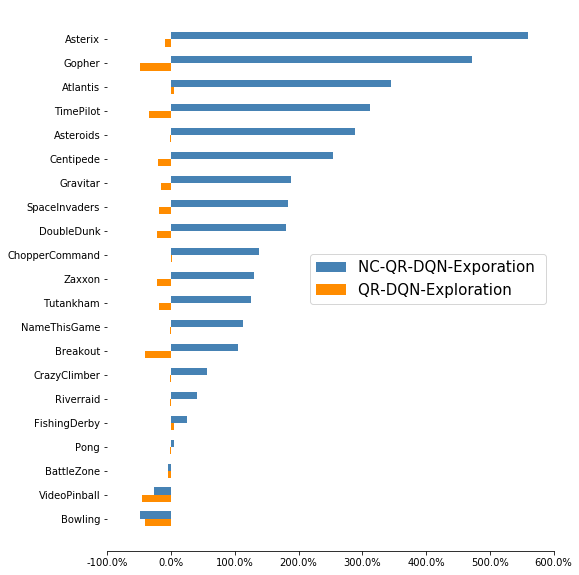

In [428]:
# gain = factor_sort[factor_sort>0.1]
# tie = factor_sort[factor_sort<=0.1]
# tie = tie[tie>-0.1]
# loss = factor_sort[factor_sort<=-0.1]

# gain = factor_sort[factor_sort>0.1]
# tie = factor_sort[factor_sort<=0.1]
# tie = tie[tie>-0.1]
# loss = factor_sort[factor_sort<=-0.1]
factor_sort2 = np.array([-0.1,-0.49,0.05,-0.35,-0.01,-0.2,-0.15,-0.18,-0.22,0.01,
                        -0.22,-0.19,-0.02,-0.4,-0.01,-0.01,0.05,-0.02,-0.04,-0.45,
                         -0.4])
print(factor_sort2.shape)
# y_pos_gain = np.arange(len(gain))
# y_pos_tie = len(gain)+np.arange(len(tie))
# y_pos_loss = len(gain)+len(tie)+np.arange(len(loss))
y_pos = np.arange(len(game_sort))
fig = plt.figure(figsize=(14, 10))
total_width ,n = 0.9,2
width = total_width / 2.9
y_pos=y_pos - (total_width - width) / 2

# grid = plt.GridSpec(1,11,hspace=1,wspace=0.1)
fig = plt.figure(figsize=(8, 10))
# x = np.arange(0,qr[0].shape[1])/qr[0].shape[1]*40
ax = fig.add_subplot(1, 1, 1)
# ax2 = plt.subplot(grid[0,7:10],sharey=ax,yticklabels=[])
# ax3 = plt.subplot(grid[0,10],sharey=ax,yticklabels=[])
# fig,(ax,ax2,ax3) = plt.subplots(1,3,sharey=True)

ax.barh(y_pos, factor_sort1, align='center',
        color='steelblue',height=0.3,label='NC-QR-DQN-Exporation ')
# ax2.barh(y_pos, factor_sort1, align='center',
#         color='navy',height=0.2,label='NC ')
# ax3.barh(y_pos, factor_sort1, align='center',
#         color='navy',height=0.2,label='NC ')
ax.barh(y_pos+width, factor_sort2, align='center',
        color='darkorange',height=0.3,label='QR-DQN-Exploration ')
# ax2.barh(y_pos+width, factor_sort2, align='center',
#         color='darkorange',height=0.2,label='NC ')
# ax3.barh(y_pos+width, factor_sort2, align='center',
#         color='darkorange',height=0.2,label='NC ')
# ax.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
# ax2.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
# ax3.barh(y_pos_tie, factor_sort[len(gain):len(gain)+len(tie)], align='center',
#         color='lime',height=0.8,label='ties')
# ax.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
# ax2.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
# ax3.barh(y_pos_loss, factor_sort[len(gain)+len(tie):], align='center',
#         color='darkorange',height=0.8,label='NC loss')
ax.set_xlim(-1,6)
# ax2.set_xlim(43.5,59.9)
# ax3.set_xlim(87.6,91)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines.set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# # ax2.spines['bottom'].set_visible(False)
# # ax2.spines.set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.spines['left'].set_visible(False)
# ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelleft='off')
# ax.tick_params(labelsize=0.1)
# ax2.get_yaxis().set_visible(False)
# # ax2.tick_params(tickright='off')
# ax3.get_yaxis().set_visible(False)
# d = .015
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# # ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs) 
# ax.plot((1 - d/4, 1 + d/4), (-d/2, +d/2), **kwargs)
# kwargs.update(transform=ax2.transAxes)
# # ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# ax2.plot((-d/2, +d/2), ( - d/2,  + d/2), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d/2, 1 + d/2), ( - d/2,  + d/2), **kwargs)
# kwargs.update(transform=ax3.transAxes)
# # ax3.plot((-d, +d), (1-d, 1+d), **kwargs) 
# ax3.plot(( - 1.8*d,  + 1.8*d), (-d/2, +d/2), **kwargs)

font1 = {
'size'   : 10,
}
ax.set_yticks(y_pos+width/2.0)
ax.set_yticklabels(game_sort,font1)
print(game_sort)
# ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(get_xlabel(ax.get_xticks()),font1)
# ax2.set_xticklabels(get_xlabel(ax2.get_xticks()),font1)
# ax3.set_xticklabels(get_xlabel(ax3.get_xticks()),font1)
# print(get_xlabel(a))
# x = ax.get_yticklabels(which='both')
# print(x)
# ax.get_yticklabels(which='both')
ax.invert_yaxis()
plt.legend(loc=5,prop={'size':15})
# ax.title('Cumulative Reward gain/loss',fontsize=18,loc='left')
fig.savefig('../quantile_curve/testcontrastreward.eps',dpi=600,format='eps')
# plt.